# Game of Thrones

I happened to bump into a Game of Thrones data set and decided it would interesting to see what was going on there.
I recently watched the seasons 1 - 7, under duress at first. But slowly realised the genius and brilliance of George RR Martin.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn # data visualization
import matplotlib.pyplot as ml # data visualisation as well
import warnings


sn.set(color_codes = True, style="white")
battles = pd.read_csv("battles.csv", sep=",", header=0)
deaths = pd.read_csv("character-deaths.csv", sep=",", header=0)
predictions = pd.read_csv("character-predictions.csv", sep=",", header=0)

We look at the basic shape of the data sets

In [2]:
battles.shape

(38, 25)

In [3]:
deaths.shape

(917, 13)

In [4]:
predictions.shape

(1946, 33)

Lets have a peek at what we are working with.

In [29]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [10]:
deaths.head()

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [11]:
predictions.head()

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

### Basic Statistical Analysis of the data sets.

In [16]:
battles.describe()

,year,battle_number,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,1.000000,1.000000,100000.000000,20000.000000,1.000000


Columns (defender_3, defender_4) are basically empty and irrelevant so we can drop them.

In [15]:
battles = battles.drop(['defender_3', 'defender_4'],1)

In [17]:
deaths.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
predictions.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


We will now see if we have any relationships between variables

In [19]:
battles.corr()

,year,battle_number,major_death,major_capture,attacker_size,defender_size,summer
year,1.000000,0.906781,-0.341050,-0.166234,0.155841,-0.366048,-0.841912
battle_number,0.906781,1.000000,-0.270421,-0.105225,0.086418,-0.297730,-0.799090
major_death,-0.341050,-0.270421,1.000000,0.264464,0.267966,0.081815,0.337136
major_capture,-0.166234,-0.105225,0.264464,1.000000,0.331961,0.249510,0.142112
attacker_size,0.155841,0.086418,0.267966,0.331961,1.000000,-0.112118,-0.273054
defender_size,-0.366048,-0.297730,0.081815,0.249510,-0.112118,1.000000,0.347108
summer,-0.841912,-0.799090,0.337136,0.142112,-0.273054,0.347108,1.000000


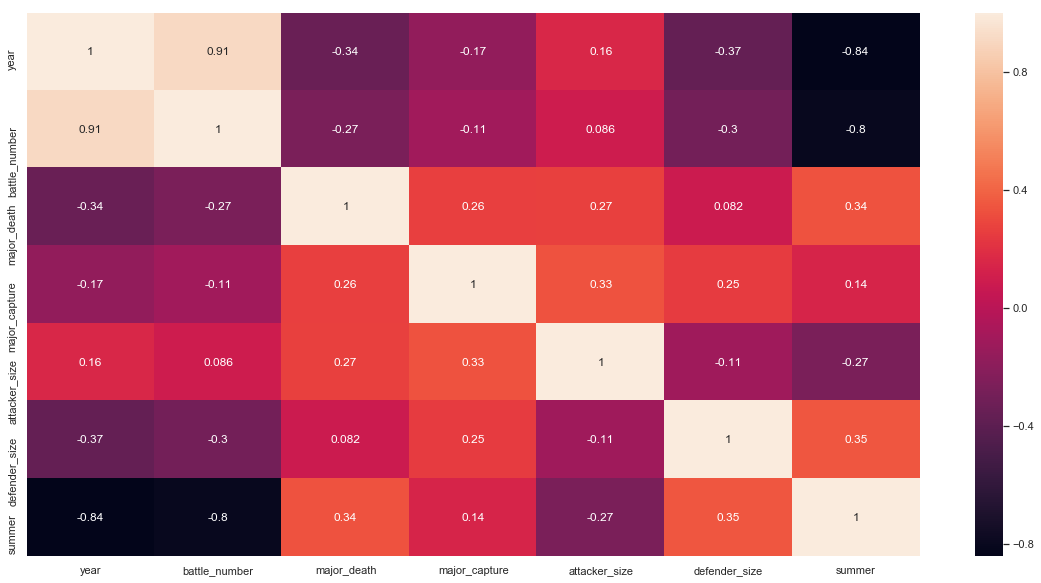

In [23]:
ml.figure(figsize=(20,10)) 
sn.heatmap(battles.corr(),annot=True)

There seems to be no correlation between any variables

In [24]:
deaths.corr()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
Death Year,1.000000,0.832274,-0.068763,0.051674,-0.135058,0.042457,-0.439234,0.077509,0.313062,0.357204,0.550213
Book of Death,0.832274,1.000000,-0.207666,0.016975,-0.111461,0.017475,-0.434004,-0.131860,0.350095,0.340436,0.714574
Death Chapter,-0.068763,-0.207666,1.000000,0.388283,-0.086533,0.075943,0.126657,0.012939,-0.149095,-0.167285,-0.145384
Book Intro Chapter,0.051674,0.016975,0.388283,1.000000,0.058684,-0.068825,0.129241,0.002445,0.158419,-0.146165,-0.077509
Gender,-0.135058,-0.111461,-0.086533,0.058684,1.000000,-0.060213,0.070228,0.063424,-0.049199,-0.040289,-0.046924
Nobility,0.042457,0.017475,0.075943,-0.068825,-0.060213,1.000000,0.087201,0.055179,0.046825,0.146088,-0.001880
GoT,-0.439234,-0.434004,0.126657,0.129241,0.070228,0.087201,1.000000,0.121257,0.004696,-0.088852,-0.120242
CoK,0.077509,-0.131860,0.012939,0.002445,0.063424,0.055179,0.121257,1.000000,-0.002049,-0.083669,-0.107276
SoS,0.313062,0.350095,-0.149095,0.158419,-0.049199,0.046825,0.004696,-0.002049,1.000000,-0.074585,-0.013294
FfC,0.357204,0.340436,-0.167285,-0.146165,-0.040289,0.146088,-0.088852,-0.083669,-0.074585,1.000000,-0.109387


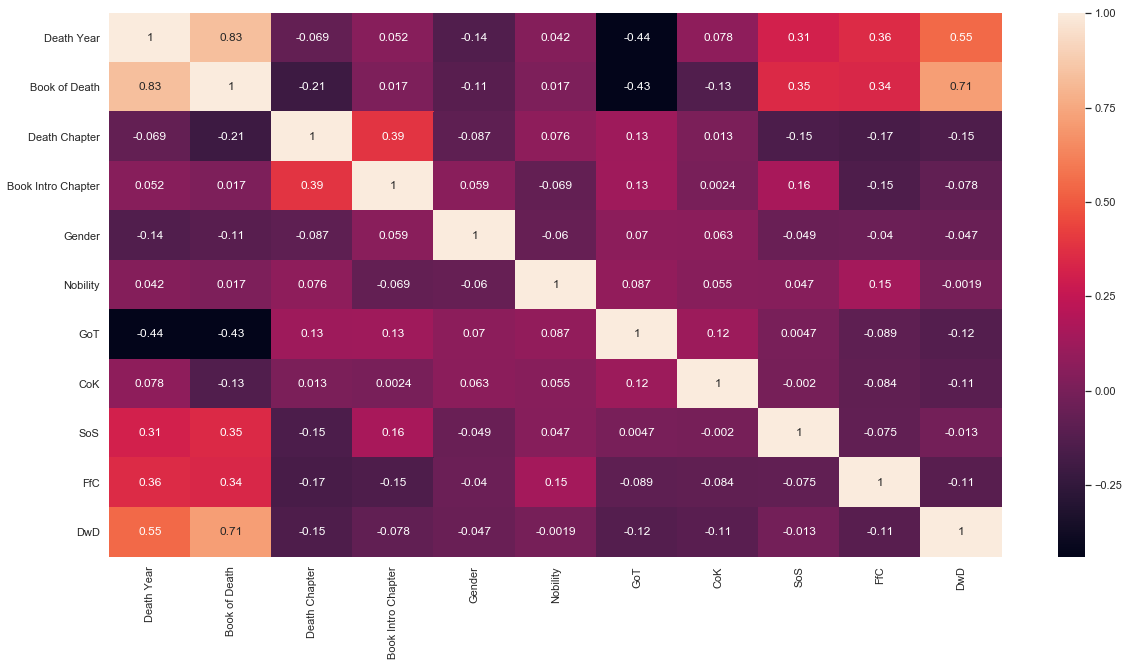

In [26]:
ml.figure(figsize=(20,10)) 
sn.heatmap(deaths.corr(),annot=True)

There seems to be a decent correlation between the Death Year and Book (DWD) Dancing with Dragons and Book of Death.

### Battles

When we look at the battles lets see who is winning.

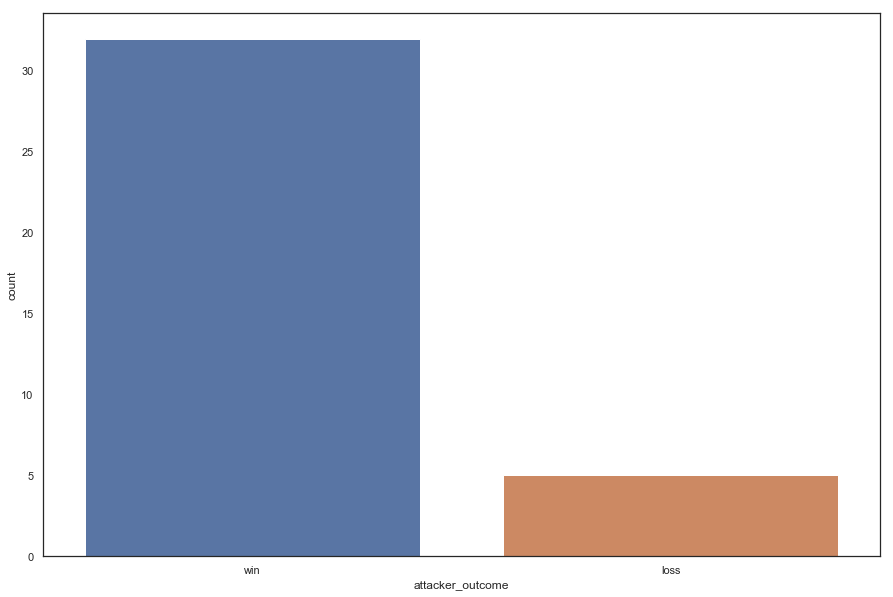

In [27]:
ml.figure(figsize = (15,10))
sn.countplot(x='attacker_outcome',data = battles)

We can say chances are if you start a battle you will likely win. Which makes sense, because one would never start a battle if they did not feel more than prepared. Also you would never attack your opponent when they expect it.

<Figure size 1080x720 with 0 Axes>

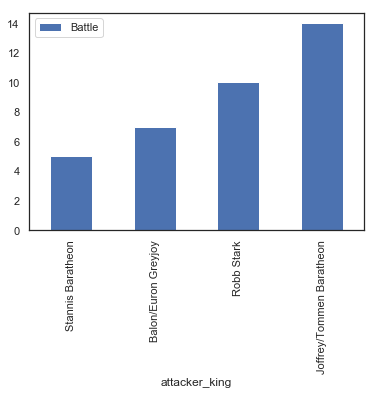

In [31]:
ml.figure(figsize = (15,10))
attack = pd.DataFrame(battles.groupby("attacker_king").size().sort_values())
attack = attack.rename(columns = {0:'Battle'})
attack.plot(kind='bar')

If you have watched the series you will not be surprised by this. I am still surprised that Robb Stark had that many battles that he started

<Figure size 1080x720 with 0 Axes>

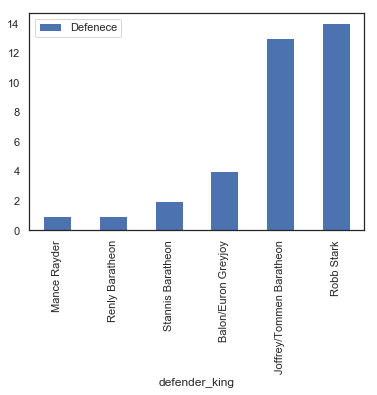

In [34]:
ml.figure(figsize = (15,10))
attack = pd.DataFrame(battles.groupby("defender_king").size().sort_values())
attack = attack.rename(columns = {0:'Defenece'})
attack.plot(kind='bar')

The Baratheon's seemed to be able to give as good as they get. Again Surprised Robb had to defend himself so many times considering he was so close to the North.

We will now look at the various win loss ratios.

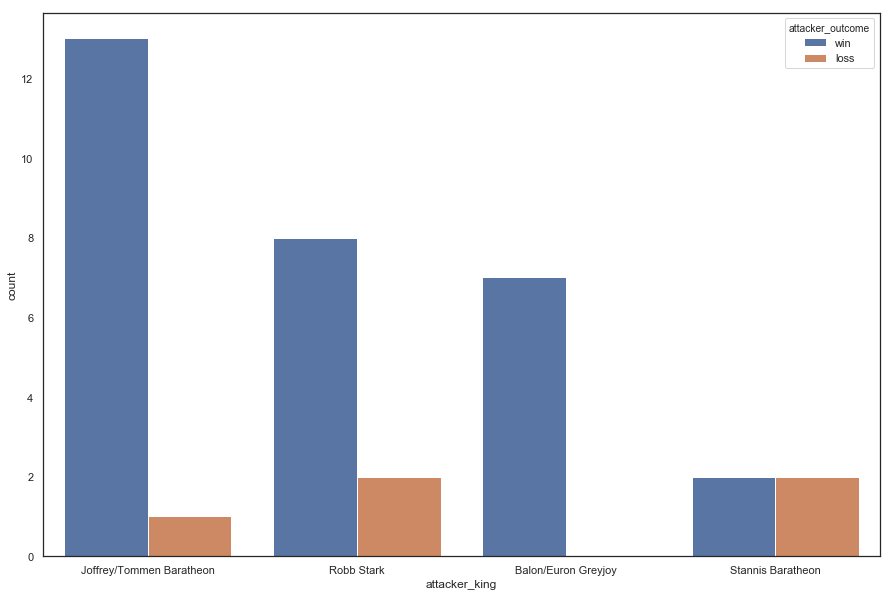

In [39]:
ml.figure(figsize = (15,10))
sn.countplot(x='attacker_king', hue = 'attacker_outcome', data = battles)


Everyone had decent win ratios bar Stannis Baratheon.

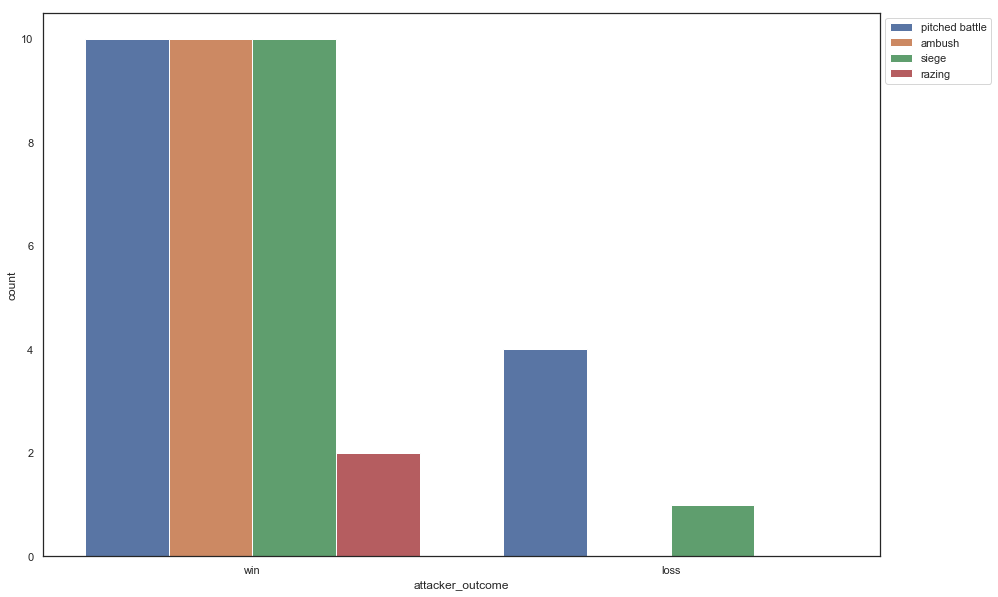

In [56]:
ml.figure(figsize = (15,10))
sn.countplot(x='attacker_outcome', hue= 'battle_type', data = battles)
ml.legend(bbox_to_anchor=(1, 1), loc=2)

Seems like sieges and razings had a best success ratios, 100%, whereas pitched battles were nearly 50/50.

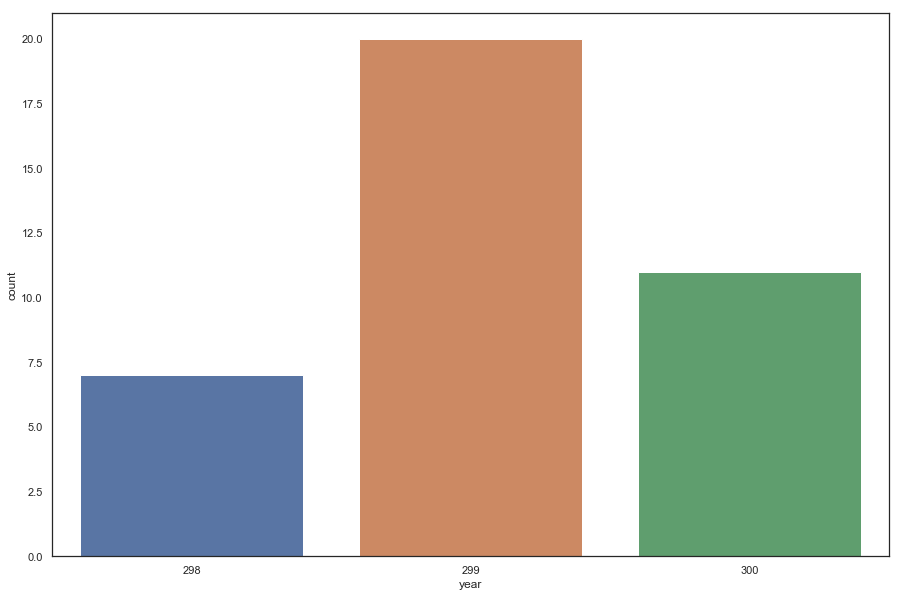

In [57]:
ml.figure(figsize = (15,10))
sn.countplot(x='year', data = battles)

The year 299 had the battles. Why? I do not know.